In [1]:
# pip install --upgrade ipyvolume

C:\Users\HP\AppData\Local\Temp\ipykernel_21464\33339446.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


itk::simple::BSplineTransform
 BSplineTransform (00000220026EA9A0)
   RTTI typeinfo:   class itk::BSplineTransform<double,3,3>
   Reference Count: 1
   Modified Time: 1719
   Debug: Off
   Object Name: 
   Observers: 
     none
   CoefficientImage: [ 00000220037FC640, 00000220037FC380, 00000220037FC900 ]
   TransformDomainOrigin: [-179.277, -43.5272, 29.795]
   TransformDomainPhysicalDimensions: [350.171, 350.171, 301.25]
   TransformDomainDirection: 1 0 0
0 1 0
0 0 1

   TransformDomainMeshSize: [128, 128, 15]
   GridSize: [131, 131, 18]
   GridOrigin: [-182.013, -46.263, 9.71167]
   GridSpacing: [2.73571, 2.73571, 20.0833]
   GridDirection: 1 0 0
0 1 0
0 0 1




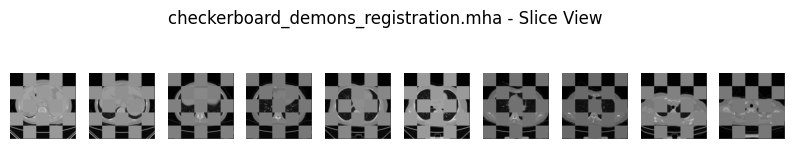

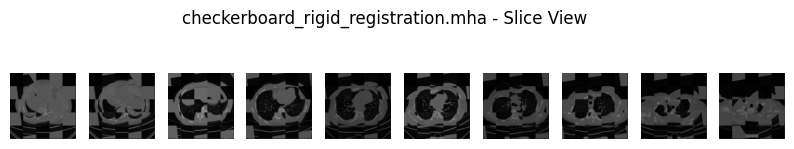

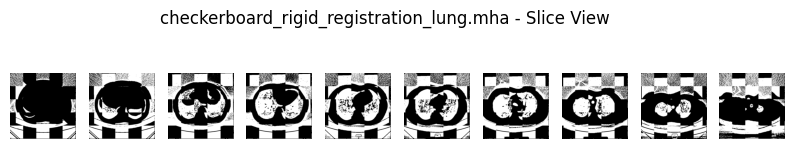

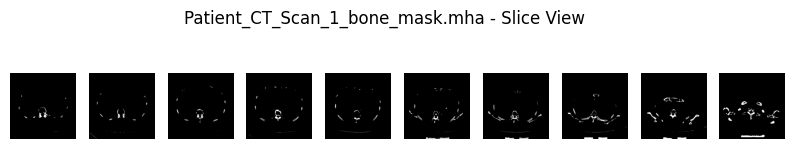

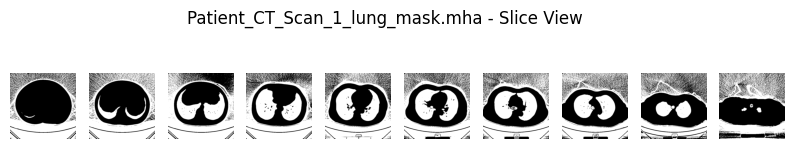

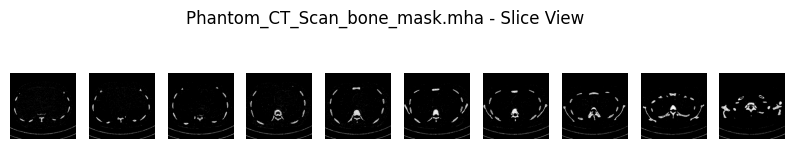

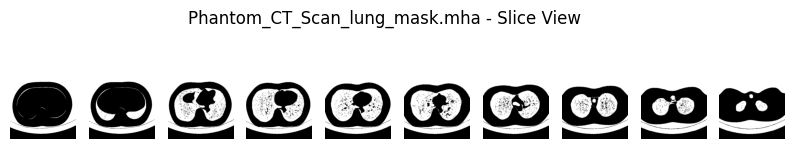

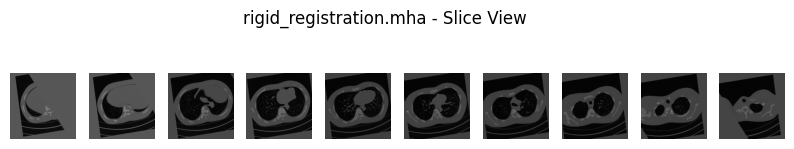

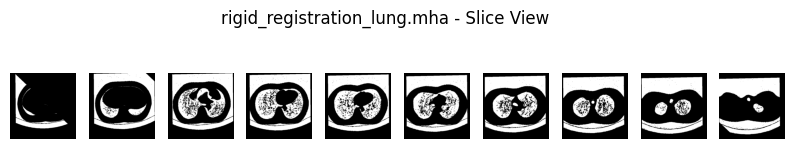

itk::simple::CompositeTransform
 CompositeTransform (00000220032F84C0)
   RTTI typeinfo:   class itk::CompositeTransform<double,3>
   Reference Count: 1
   Modified Time: 3920
   Debug: Off
   Object Name: 
   Observers: 
     none
   Transforms in queue, from begin to end:
   >>>>>>>>>
   Euler3DTransform (00000220033F6440)
     RTTI typeinfo:   class itk::Euler3DTransform<double>
     Reference Count: 1
     Modified Time: 3916
     Debug: Off
     Object Name: 
     Observers: 
       none
     Matrix: 
       0.955733 -0.124333 0.266677 
       0.160883 0.979672 -0.119829 
       -0.246357 0.157429 0.956308 
     Offset: [-19.7643, -241.141, -383.543]
     Center: [-4.1918, 131.558, 180.42]
     Translation: [12.1781, -266.11, -369.682]
     Inverse: 
       0.955733 0.160883 -0.246357 
       -0.124333 0.979672 0.157429 
       0.266677 -0.119829 0.956308 
     Singular: 0
     Euler's angles: AngleX=0.158086 AngleY=0.252131 AngleZ=0.126238
     m_ComputeZYX = 0
   End of MultiTra

itk::simple::CompositeTransform
 CompositeTransform (00000220032F8940)
   RTTI typeinfo:   class itk::CompositeTransform<double,3>
   Reference Count: 1
   Modified Time: 3942
   Debug: Off
   Object Name: 
   Observers: 
     none
   Transforms in queue, from begin to end:
   >>>>>>>>>
   Euler3DTransform (00000220033F6640)
     RTTI typeinfo:   class itk::Euler3DTransform<double>
     Reference Count: 1
     Modified Time: 3938
     Debug: Off
     Object Name: 
     Observers: 
       none
     Matrix: 
       0.994126 -0.00824777 0.107911 
       0.0202289 0.99368 -0.11041 
       -0.106318 0.111944 0.988011 
     Offset: [-6.22811, -245.27, -382.689]
     Center: [-4.1918, 131.558, 180.42]
     Translation: [12.1807, -266.107, -369.679]
     Inverse: 
       0.994126 0.0202289 -0.106318 
       -0.00824777 0.99368 0.111944 
       0.107911 -0.11041 0.988011 
     Singular: 0
     Euler's angles: AngleX=0.11218 AngleY=0.107196 AngleZ=0.00830004
     m_ComputeZYX = 0
   End of Multi

In [2]:
import os
import SimpleITK as sitk
import ipyvolume as ipv
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import ipywidgets as widgets
data = np.random.rand(100,100,100)
ipv.volshow(data)
# Directory where the data is located
data_dir = 'Results'

# Get the list of folder names
folders = os.listdir(data_dir)

def display_images(image, title, montage_slices=10):
    # Convert the SimpleITK image to a numpy array
    image_array = sitk.GetArrayFromImage(image)
    
    # Check for division by zero
    if image_array.max() != image_array.min():
        image_array = ((image_array - image_array.min()) * (1/(image_array.max() - image_array.min()) * 255)).astype('uint8')
    else:
        image_array = np.zeros_like(image_array).astype('uint8')

    # 3D visualization using ipyvolume
    ipv.figure()
    ipv.volshow(image_array, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=255)
    fig3d = ipv.gcc()
    
    # Create a layout with a title
    title_widget = widgets.HTML(f'<h2>{title} - 3D View</h2>')
    layout = widgets.VBox([title_widget, fig3d])
    display(layout)

    # Montage of slices using matplotlib
    fig = plt.figure(figsize=(10, 2))
    fig.suptitle(title + " - Slice View")
    slice_interval = image_array.shape[0] // montage_slices
    for i in range(montage_slices):
        ax = fig.add_subplot(1, montage_slices, i + 1)
        ax.imshow(image_array[i * slice_interval], cmap='gray')
        plt.axis('off')
    plt.show()

# For each folder
for folder in folders:
    # Full path to the folder
    full_path = os.path.join(data_dir, folder)

    # Get the list of files in the folder
    files = os.listdir(full_path)

    # For each file
    for file in files:
        # Full path to the file
        file_path = os.path.join(full_path, file)

        # Read and display the .mha file
        if file.endswith('.mha'):
            # Read the .mha image file
            image = sitk.ReadImage(file_path)
            display_images(image, file)

        # Read and display the .tfm file
        elif file.endswith('.tfm'):
            # Read the .tfm transformation file
            transform = sitk.ReadTransform(file_path)
            display(HTML(f'<h2>{file}</h2>'))
            print(transform)
